In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import copy
import math
from skimage import metrics

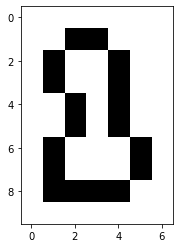

In [4]:
img = cv2.imread('1.png',0)
plt.imshow(img,'gray')

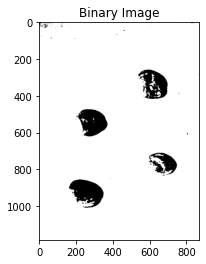

In [3]:
# blur = cv2.GaussianBlur(img,(5,5),0)
(thresh, blackAndWhiteImage) = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.title('Binary Image')
plt.imshow(blackAndWhiteImage,'gray')

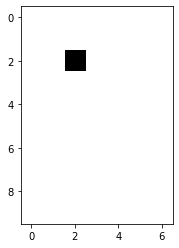

In [212]:
rows , cols = img.shape
X0=[[255]*cols]*rows
X0=np.array(X0)
X0[2][2]=0

plt.imshow(X0,'gray')

In [213]:
strc_ele=np.array([[1,0,1],[0,0,0],[1,0,1]])

padded_arr =np.zeros((img.shape[0]+2,img.shape[1]+2),'uint8')

def duplicate_padding(arr, size):

    list1 = []  # Initialise a list to take the upper border pixels of real image
    list2 = []  # Initialise a list to take the left border pixels of real image
    list3 = []  # Initialise a list to take the lower border pixels of real image
    list4 = []  # Initialise a list to take the right border pixels of real image

    # Fill list1 by upper border pixels of real image
    for i in range(size, arr.shape[1]-size):
        list1.append(arr[size][i])

    # Copy list1 in upper padded zero pixels
    for i in range(size-1, -1, -1):
        list1.insert(0, list1[0])
        list1.append(list1[len(list1)-1])
        arr[i][i:i+len(list1)] = list1

    # Fill list2 by left border pixels of real image
    for i in range(size, arr.shape[0]-size):
        list2.append(arr[i][size])

    # Copy list2 in left padded zero pixels
    for i in range(size-1, -1, -1):
        list2.insert(0, list2[0])
        list2.append(list2[len(list2)-1])
        index = 0
        for j in range(i, i+len(list2)):
            arr[j][i] = list2[index]
            index += 1

    # Fill list3 by lower border pixels of real image
    for i in range(size, arr.shape[1]-size):
        list3.append(arr[arr.shape[0]-size-1][i])

    # Copy list3 in lower padded zero pixels
    t = size-1
    for i in range(arr.shape[0]-size, arr.shape[0]):
        list3.insert(0, list3[0])
        list3.append(list3[len(list3)-1])
        arr[i][t:t+len(list3)] = list3
        t -= 1

    # Fill list4 by right border pixels of real image
    for i in range(size, arr.shape[0]-size):
        list4.append(arr[i][arr.shape[1]-size-1])

    # Copy list4 in right padded zero pixels
    t = size-1
    for i in range(arr.shape[1]-size, arr.shape[1]):
        list4.insert(0, list4[0])
        list4.append(list4[len(list4)-1])
        index = 0
        for j in range(t, t+len(list4)):
            arr[j][i] = list4[index]
            index += 1
        t -= 1

    return arr

def padding(img, size, type):

    # Initialise the Padded Matrix
    padded_arr = np.zeros((img.shape[0]+(size*2), img.shape[1]+(size*2)))

    # Fill the padded matrix by original image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            padded_arr[i+size][j+size] = img[i][j]

    if(type == 1):
        padded_arr = duplicate_padding(padded_arr, size)
    if(type == 2):
        padded_arr = mirror_padding(padded_arr, img, size)

    return padded_arr # Return padded array


padded_arr=padding(blackAndWhiteImage,1,1)

In [214]:
img1=np.zeros(img.shape,'uint8')
Xpr=np.zeros(img.shape,'uint8')
Xprev=np.zeros(img.shape,'uint8')
Ac=np.zeros(img.shape,'uint8')

Xpr=copy.deepcopy(X0)
Xprev=copy.deepcopy(X0)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j]==0:
            Ac[i][j]=255
        else:
            Ac[i][j]=0


while True:
    Xprev=copy.deepcopy(Xpr)
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            padded_arr[i+1][j+1] = Xprev[i][j]

    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            if (np.sometrue(np.equal(strc_ele,padded_arr[i:i+3,j:j+3]))):
                img1[i][j]=0
            else:
                img1[i][j]=255

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            Xpr[i][j]=img1[i][j] or Ac[i][j]

    if (np.alltrue(np.equal(Xpr,Xprev)) == True):
        break

In [215]:
final_img=np.zeros(img.shape,'uint16')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        final_img[i][j]=Xpr[i][j] and blackAndWhiteImage[i][j]

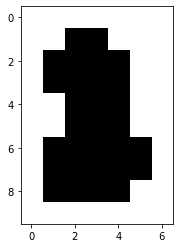

In [216]:
plt.imshow(final_img,'gray')